In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
from ctadiv import *

## Select the CTA location and time of observation

In [8]:
cta = CTA_Info('north','2020-06-20T00:00')

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-06-20T00:00:00.000


## Set source location

In [4]:
print ("source:", cta.source)
cta.set_source_loc(ra=279.232102, dec=38.782316)
print ("source:", cta.source)

source: None
source: <SkyCoord (AltAz: obstime=2020-06-20T00:00:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (59.4752045, 64.31210302)>


## Get locations (sun, moon, source)

## Plot the naviation plot (Sun, Moon, and a source)

<IPython.core.display.Javascript object>


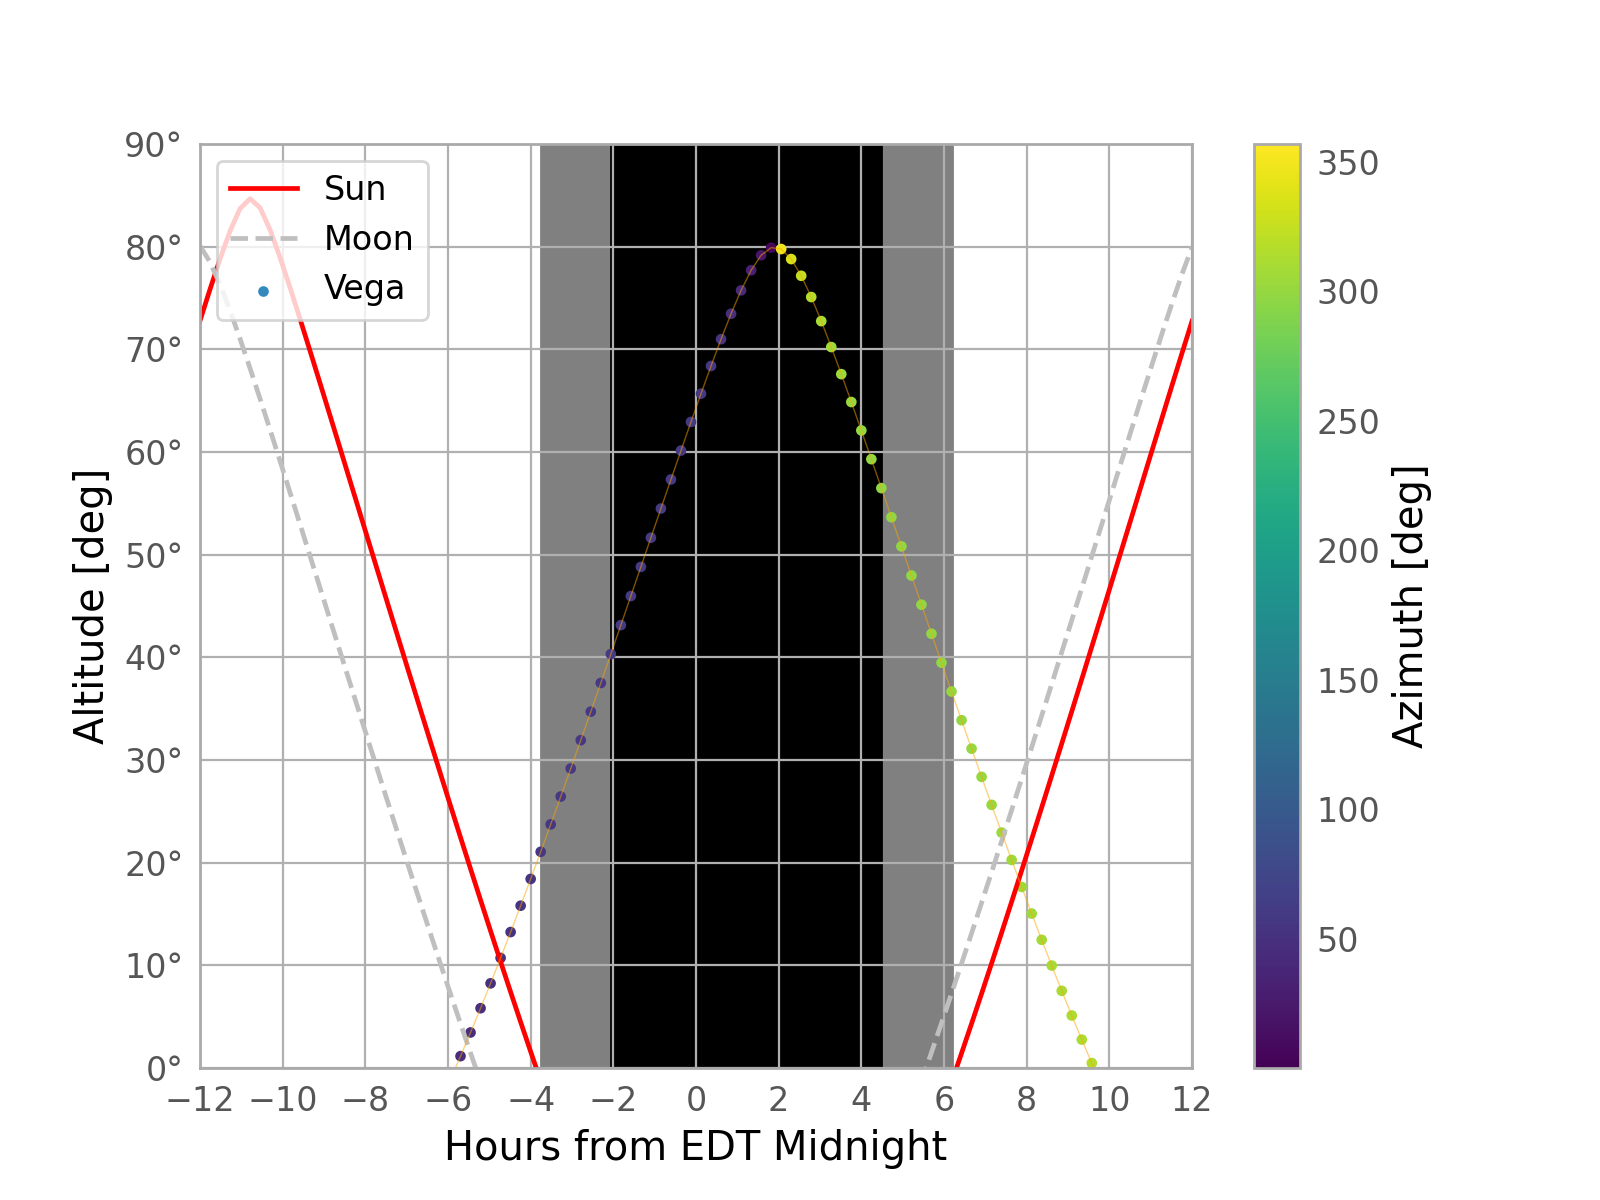

<module 'matplotlib.pyplot' from '/Users/dtak/Software/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [5]:
cta.navigation_plot(label="Vega")

## Load array and pointing to a source

In [9]:
array =  LoadConfig("./config/layout-3AL4M15-5.txt", frame=cta, pointing2src=True)

#array.set_pointing_coord(ra=279.232102, dec=38.782316)

array.table.units='deg'
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39,-70.04,-7.23,54.0,59.475,64.312,25.688,28.000,2.150,14.536,0.220,-0.373,0.901,34.63
40,-34.37,110.98,43.0,59.475,64.312,25.688,28.000,2.150,14.536,0.220,-0.373,0.901,94.18
41,76.18,95.34,39.7,59.475,64.312,25.688,28.000,2.150,14.536,0.220,-0.373,0.901,166.98
42,31.81,-19.7,43.0,59.475,64.312,25.688,28.000,2.150,14.536,0.220,-0.373,0.901,117.20
43,-210.65,50.51,61.3,59.475,64.312,25.688,16.000,3.850,46.707,0.220,-0.373,0.901,137.60
44,-179.06,223.02,42.1,59.475,64.312,25.688,16.000,3.850,46.707,0.220,-0.373,0.901,222.09
45,27.96,243.56,23.2,59.475,64.312,25.688,16.000,3.850,46.707,0.220,-0.373,0.901,241.86
46,176.27,127.9,19.3,59.475,64.312,25.688,16.000,3.850,46.707,0.220,-0.373,0.901,273.21


## Activate the divergent pointing mode

In [10]:
array.divergent_pointing(0.01)

In [11]:
array.hFoV(m_cut=3)

<Quantity 92.8015067 deg2>

<IPython.core.display.Javascript object>


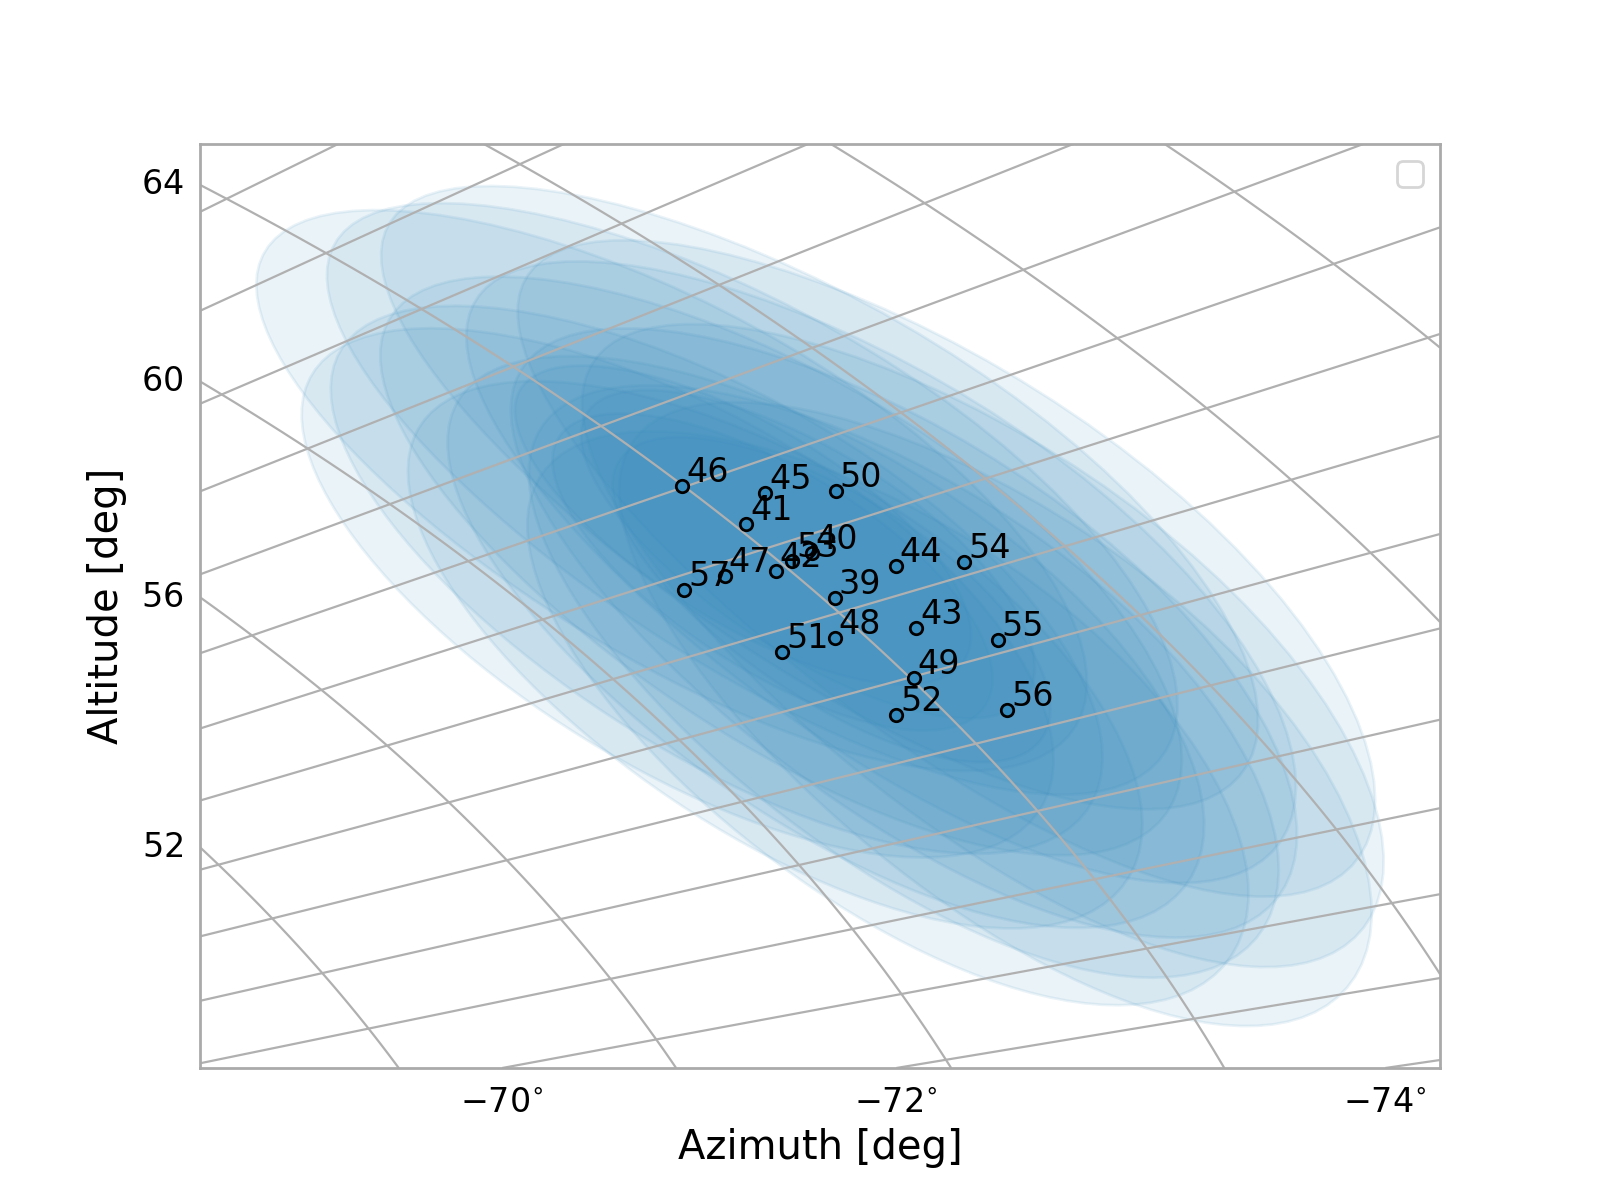

No handles with labels found to put in legend.


In [12]:
array.skymap_polar()

<IPython.core.display.Javascript object>


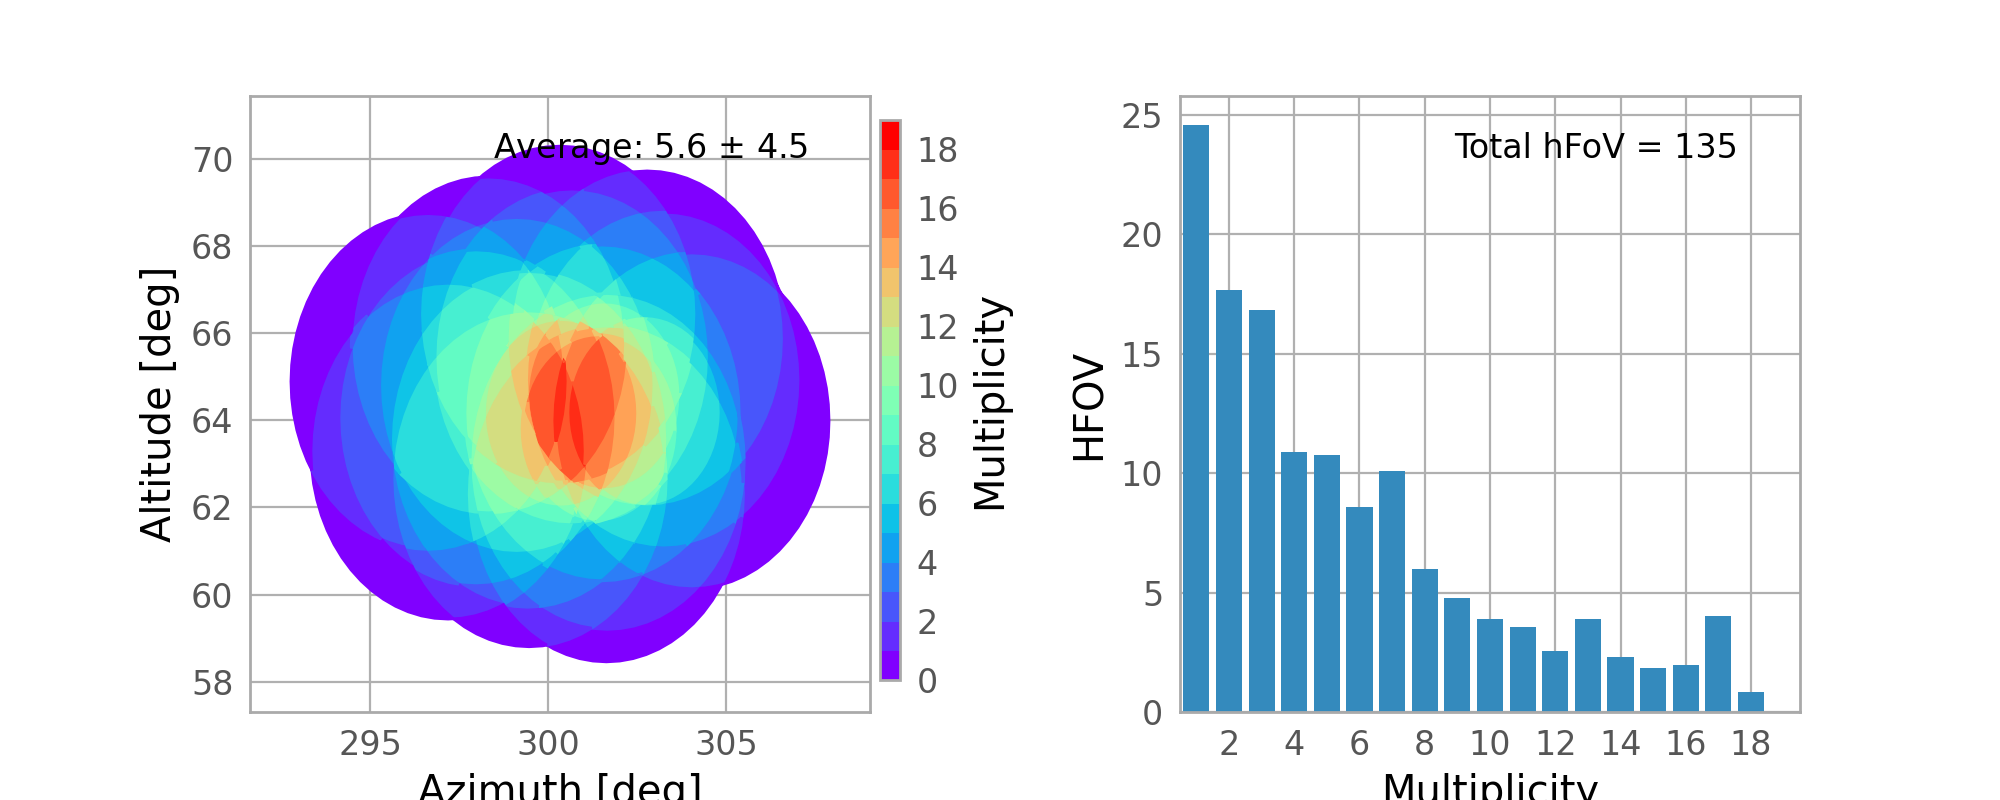

In [13]:
array.multiplicity_plot()

## Shifting the observation time and check how it change

In [28]:
array.update_frame(time = '2020-06-20T00:00', verbose=True)
array.update_frame(delta_t = 20*u.min, verbose=True)

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-06-20T00:00:00.000
Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-06-20T00:20:00.000


In [29]:
array.hFoV(m_cut=3)

<Quantity 98.61511731 deg2>

<IPython.core.display.Javascript object>


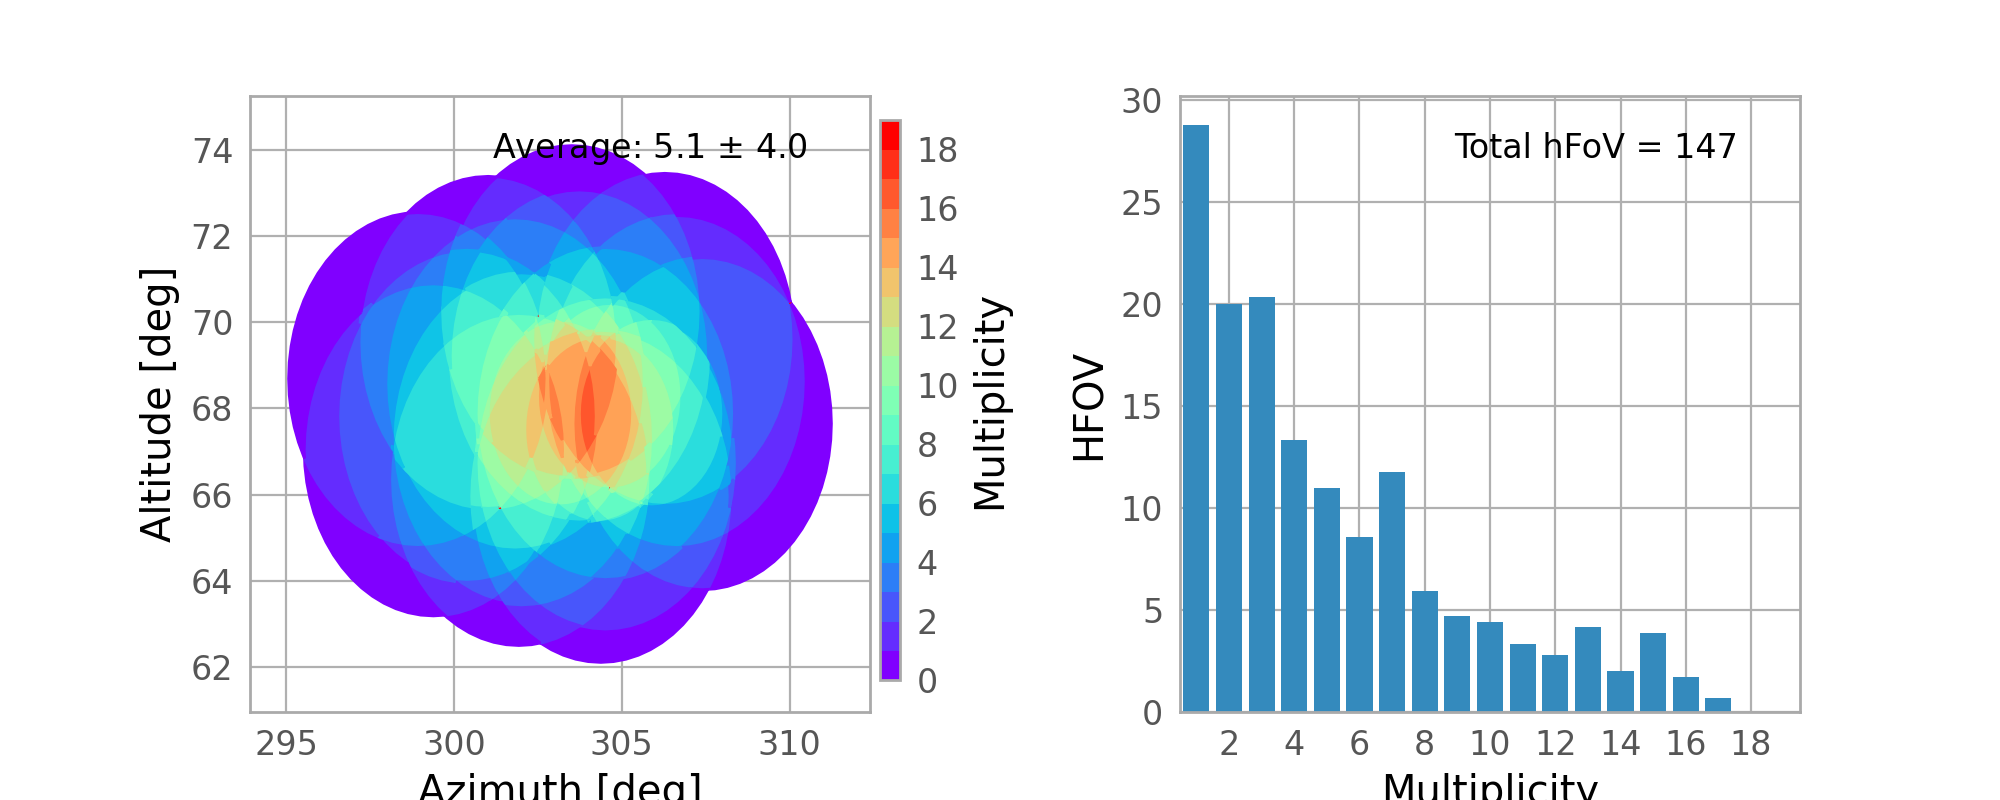

In [19]:
array.multiplicity_plot()

## Get parameters (hFoV, alt, and m) as a function of time

In [20]:
array.update_frame(time = '2020-06-20T00:00')

fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
hFoV = [fov.value]
mAve = [m_ave]
t = [0]
alt = [array.pointing["alt"].value]
for i in range(24):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
    hFoV.append(fov.value)
    mAve.append(m_ave)
    alt.append(array.pointing["alt"].value)

<IPython.core.display.Javascript object>


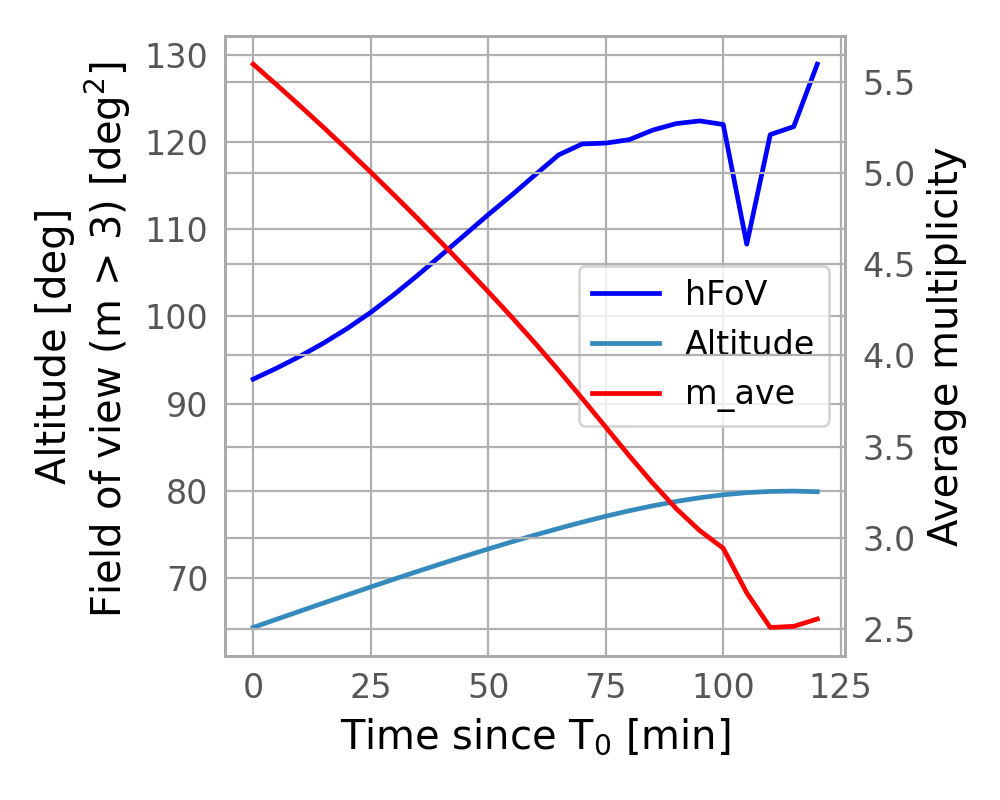

In [21]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view (m > 3) [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)